<a href="https://colab.research.google.com/github/kozen88/ProgettoIcon2023/blob/main/Tecniche_di_campionamento_WORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tecniche per il trattamento dell'imbalance learning
Inizieremo a trattare il problema dell'apprendimento di un data set sbilanciato con le principali tecniche note in letterature.

- Undersampling or Downsampling
- OverSampling or Upsampling
- Approccio misto Under&Over sampling
- Cost Sensitive Learning
- Apprendimento non supervisionato
- Ensemble learning

## Tecniche basate sul Campionamento
Iniziamo a prendere visione delle tecniche di campionamento che cercano di aumentare o diminuire gli esempi a disposizione per cercare di bilanciare le due classi.

In [1]:
from ast import increment_lineno
import numpy as np
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate,cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.metrics import precision_score, f1_score, fbeta_score, recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline
sns.set_style('darkgrid')

In [2]:
df_impiegati = pd.read_excel('Data_set_impiegati_one_hot_enc.xlsx')

### SMOTEENN

In [3]:
from imblearn.combine import SMOTEENN

In [5]:
# Andiamo a bilanciare il dataset con lo SMOTEENN approccio ibrido dato da SMOTE + ENN
X = pd.read_excel('Impiegati_OHE_std_withoutTarget.xlsx')
y = df_impiegati["left"]

sme = SMOTEENN(random_state=0, sampling_strategy=0.9)
X_res, y_res = sme.fit_resample(X, y)

In [10]:
# Adesso dopo aver usato lo SMOTEENN andiamo a ricostruire il dataset in modo da aver
# un nuovo dataset bilanciato con tecnica ibrida SMOTEENN
data_balanced_smoteenn = X_res
data_balanced_smoteenn["left"] = y_res
data_balanced_smoteenn.drop_duplicates()
data_balanced_smoteenn.to_csv("Data_impiegati_smoteenn.csv", index=False)

In [11]:
data_balanced_smoteenn

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_RandD,department_accounting,department_human_resources,department_management,department_marketing,department_product_mng,department_sales,department_technical,salary_high,salary_low,salary_medium,left
0,-0.132062,0.139622,0.159788,0.279320,-0.341235,-0.411165,-0.147412,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.836653,-0.299809,1.024775,-0.868132,0
1,0.833258,-0.269343,-1.462863,0.019016,-0.341235,-0.411165,-0.147412,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.836653,-0.299809,1.024775,-0.868132,0
2,-0.654943,-0.152496,0.971113,-0.161196,-0.341235,-0.411165,-0.147412,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.836653,-0.299809,1.024775,-0.868132,0
3,0.672371,0.607012,0.971113,0.920071,-0.341235,-0.411165,-0.147412,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.836653,-0.299809,1.024775,-0.868132,0
4,-0.494057,-0.678309,-0.651538,0.259297,-1.026126,-0.411165,-0.147412,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.836653,-0.299809,1.024775,-0.868132,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20531,-0.936495,-1.478253,-1.462863,-0.954441,-0.341235,-0.411165,-0.147412,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.836653,-0.299809,-0.975824,1.151898,1
20532,-0.759597,-0.853580,-1.462863,-1.314682,-0.341235,-0.411165,-0.147412,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,3.953303,-0.617455,-0.836653,-0.299809,-0.975824,1.151898,1
20533,-2.030044,0.373317,1.782438,0.914422,0.343655,-0.411165,-0.147412,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,-0.617455,1.195238,-0.299809,1.024775,-0.868132,1
20534,-0.920184,-1.046217,-1.462863,-1.458936,-0.341235,-0.411165,-0.147412,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.836653,-0.299809,1.024775,-0.868132,1


In [12]:
excel_file = 'Data_impiegati_smoteen.xlsx'
data_balanced_smoteenn.to_excel(excel_file, index=False)

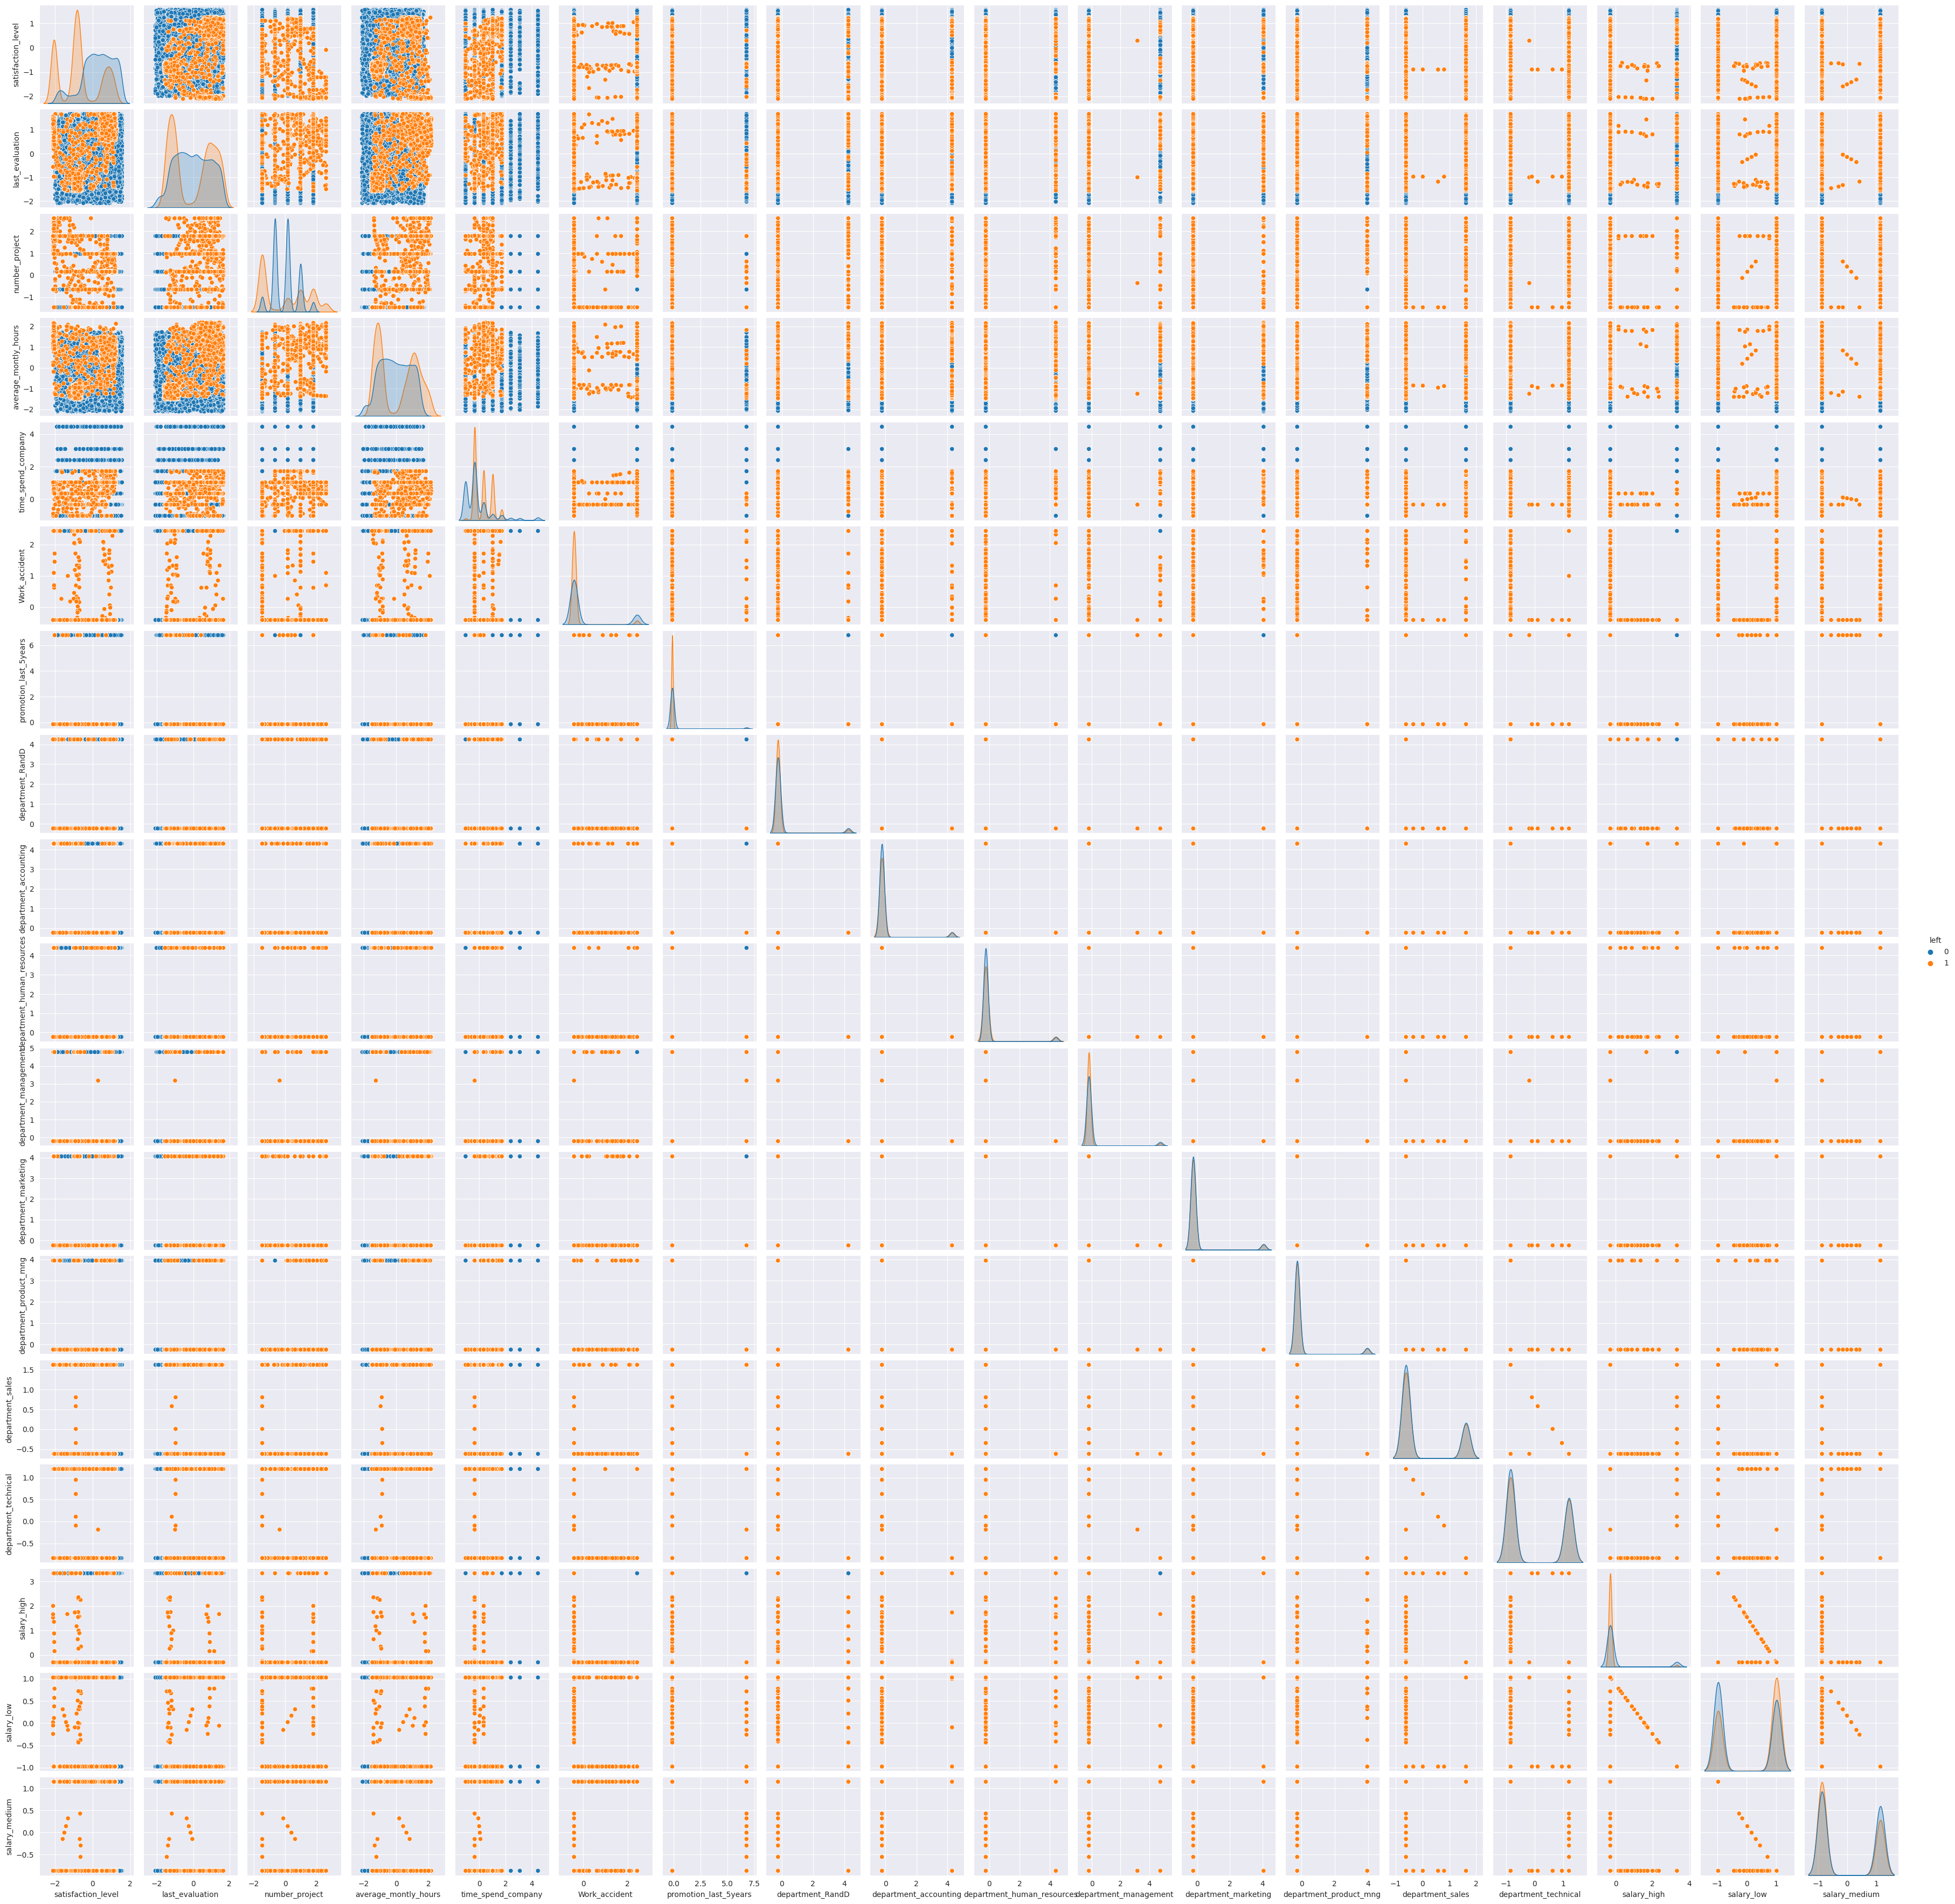

In [13]:
# Prendiamo visualizzazione di quello che è successo hai dati dopo la tecni di SMOTEENN
data_balanced_smoteenn_plot = sns.pairplot(data_balanced_smoteenn, hue='left', height=2)

In [18]:
def plot_class_distribution(class_counts, title):
    plt.figure(figsize=(6, 4))
    ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette="pastel", alpha=0.8)
    plt.xlabel('Classe\nRestano=0  vs  Lasciano=1')
    plt.ylabel('Numero di impiegati per classe')
    plt.title(title)

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.show()

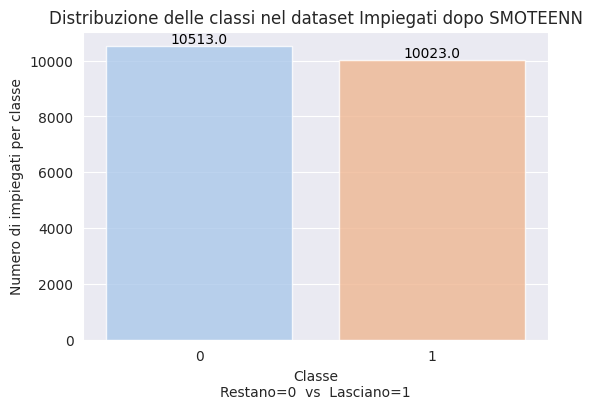

In [19]:
# andiamo a definire su quale colonna eseguire il conteggio degli esempi per classe
class_counts_smoteenn = data_balanced_smoteenn['left'].value_counts()

# Crea un barplot per mostrare lo sbilanciamento tra le classi dopo lo SMOOTEEEN
plot_class_distribution(class_counts_smoteenn, 'Distribuzione delle classi nel dataset Impiegati dopo SMOTEENN')

In [22]:
def plot_pie_chart(class_counts, title, legend_labels, startangle=40, fontsize=12, fontweight='bold'):
    plt.figure(figsize=(6, 6))
    colors = sns.color_palette('pastel')
    sns.set_palette(colors)

    def func(pct, allvalues):
        absolute = int(pct / 100. * np.sum(allvalues))
        return f"{pct:.2f}%\n({absolute:,d})"

    explode = (0.02,) + (0,) * (len(class_counts) - 1)  # Add space only to the first slice

    plt.pie(class_counts, labels=class_counts.index, autopct=lambda pct: func(pct, class_counts), startangle=startangle,
            textprops={'fontsize': fontsize, 'fontweight': fontweight}, explode=explode, shadow=True)

    plt.title(title)
    plt.axis('equal')

    plt.legend(legend_labels, loc='lower right')  # Custom legend

    plt.show()

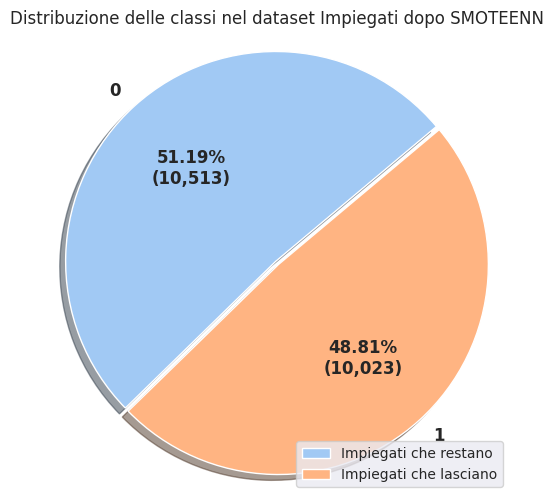

In [23]:
legend_labels = ['Impiegati che restano', 'Impiegati che lasciano']
plot_pie_chart(class_counts_smoteenn, 'Distribuzione delle classi nel dataset Impiegati dopo SMOTEENN', legend_labels, startangle=40, fontsize=12, fontweight='bold')

### ADASYN

In [24]:
from imblearn.over_sampling import ADASYN

In [25]:
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

In [28]:
# Adesso dopo aver usato lo ADASYN andiamo a ricostruire il dataset in modo da aver
# un nuovo dataset bilanciato con tecnica di oversampling data da ADASYN
data_balance_adasyn = X_adasyn
data_balance_adasyn["left"] = y_adasyn
data_balance_adasyn.drop_duplicates()
data_balance_adasyn.to_csv("Data_impiegati_adasyn.csv", index=False)

In [29]:
excel_file_2 = 'Data_impiegati_adasyn.xlsx'
data_balance_adasyn.to_excel(excel_file_2, index=False)